In [1]:
# https://github.com/pmstangmailcom/rs_school/blob/main/EDA_data_exploration.ipynb
#     link submit

In [109]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import os
%matplotlib inline

In [110]:
passengers_before_cleaning = pd.read_csv('EDA_data_exploration_data.csv')
passengers_before_cleaning.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Context

Things to do:
1. Learning information about dataset
2. Cleaning data
3. Exploratory data analysis (form some hypotheses and make conclusions)
4. Summary

The dataset contains the passengers list of "Titanic". The dataset contains information about the passengers (several features), and the information if they are survived or not (target variable).

Labels to note:

1. PassengerId – passenger id 
2. Survived – died (0) or survived (1)
3. Pclass – ticket class (first (1), second (2) or third (3))
4. Name – name of passenger
5. Sex – male/ female
6. Age 
7. SibSp -  number of brothers, sisters or spouses
8. Parch - number of parents and children
9. Ticket – ticket number
10. Fare - ticket price
11. Cabin - cabin number
12. Embarked – port of embarkation (C - Cherbourg; Q - Queenstown; S - Southampton)

In [111]:
passengers_before_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


As we can see, we have 12 features. One feature  ('Survived') – is dependent target variable, others are features.
In total, there are 100,000 records in the dataset. As we can see, there are a few columns with Nan values.

In [112]:
passengers_before_cleaning.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


# Data quality assessment

### Find and drop duplicates

In [113]:
passengers_before_cleaning.shape

(100000, 12)

In [114]:
passengers_before_cleaning.drop_duplicates()
passengers_before_cleaning.shape


(100000, 12)

As we see, there weren't duplicates

### Processing of missing values

Heatmap of missing values


<AxesSubplot:>

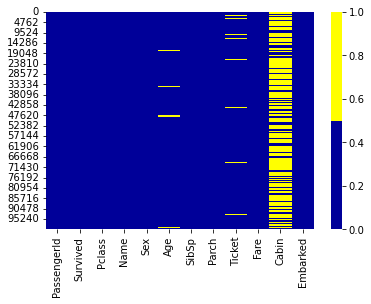

In [115]:

colours = ['#000099', '#ffff00'] # yellow - NaN, blue - not NaN
sns.heatmap(passengers_before_cleaning.isnull(), cmap=sns.color_palette(colours))

We see feature 'Cabin' has a lot of NaN's.  Specify the number of NaN's (in percents)

In [116]:
passengers_before_cleaning.isnull().mean()*100


PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.292
SibSp           0.000
Parch           0.000
Ticket          4.623
Fare            0.134
Cabin          67.866
Embarked        0.250
dtype: float64

NaN's in feature 'Cabin' are almost 70%, this feature can be ignored

Drop rows with NaN in columns 'Embarked', 'Fare', this is only 0.384% of all values.

In [270]:
passengers = passengers_before_cleaning.dropna(subset=['Embarked', 'Fare'])
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


NaN of 'Age' replace by median age

In [271]:
age_median = passengers['Age'].median()
passengers['Age'].fillna(value=age_median, inplace=True)

C:\Users\churi\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Replace all NaN's of the column 'Ticket' with 'no ticket number' . Replace all NaN's of the column 'Cabin' with 'no cabin number'

In [272]:

passengers.fillna({'Ticket': 'no ticket number', 'Cabin': 'no cabin number'}, inplace=True)

Check that we don't have any NaN

In [273]:
passengers.isnull().mean()*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

Now we don't have any NAN's


### Let's process categorical features. 

In [274]:

passengers['Sex'].value_counts()


male      55920
female    43697
Name: Sex, dtype: int64

S    72047
C    22154
Q     5416
Name: Embarked, dtype: int64

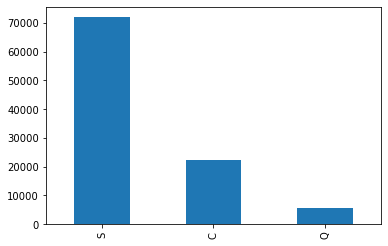

In [275]:
passengers['Embarked'].value_counts().plot.bar()
passengers['Embarked'].value_counts()

Нас интересуют столбцы:
    Sex (принимает два варианта значений, распределение значений примерно одинаковое, что делает этот признак информативным), Embarked (три варианта).
Признаки Name, Ticket, Cabin не меняем

We are interested in the columns:
1. 'Sex' (accepts two variants of values, the distribution of values is almost 50X50, which makes this feature informative), 
2. 'Embarked' (three variants).

Columns 'Name', 'Ticket', 'Cabin' we do not change

Use One Hot Encoding

In [276]:
passengers = pd.get_dummies(passengers, columns=['Sex', 'Embarked'])
passengers.tail()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
99995,99995,1,2,"Bell, Adele",62.0,0,0,PC 15008,14.86,D17243,1,0,1,0,0
99996,99996,0,2,"Brown, Herman",66.0,0,0,13273,11.15,no cabin number,0,1,0,0,1
99997,99997,0,3,"Childress, Charles",37.0,0,0,no ticket number,9.95,no cabin number,0,1,0,0,1
99998,99998,0,3,"Caughlin, Thomas",51.0,0,1,458654,30.92,no cabin number,0,1,0,0,1
99999,99999,0,3,"Enciso, Tyler",55.0,0,0,458074,13.96,no cabin number,0,1,0,0,1


### Analyze the outliers

Column 'Survived' must take the values 1 or 2, Pclass - values 1, 2 or 3. Let's check it.

In [277]:
passengers['Survived'].unique()

array([1, 0], dtype=int64)

In [278]:
passengers['Pclass'].unique()

array([1, 3, 2], dtype=int64)

Let's look up on columns 'Age'.

In [279]:
passengers['Age'].describe()

count    99617.000000
mean        38.373983
std         18.010471
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

We see that age changes from 0,08 to 87 years old, which may be true

?????????????????????????Анализируем наличие выбросов стоимость билета для разных классов

# Data exploration

### Exploration of each individual variable

In [331]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:title={'center':'Distribution of Survived (1) and not Survived (0) passengers'}>

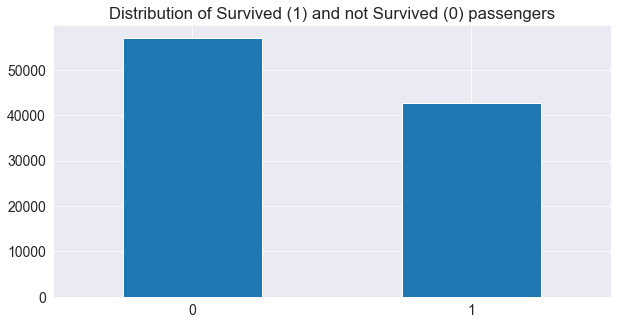

In [332]:
plt.title('Distribution of Survived (1) and not Survived (0) passengers')
passengers['Survived'].value_counts().plot.bar(rot=0)

The target 'Survived' good target, it has almost 50x50 distribution 

<AxesSubplot:title={'center':'Distribution of male and female passengers'}, xlabel='Sex_male,Sex_female'>

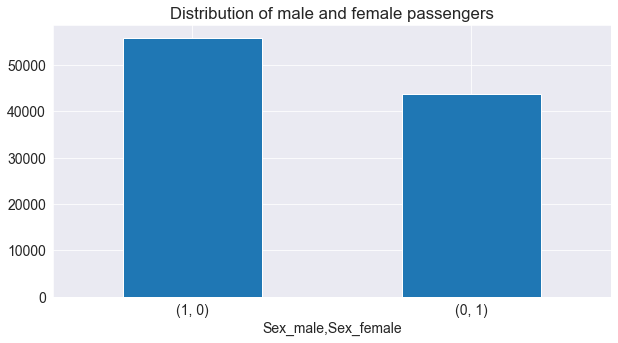

In [333]:
plt.title('Distribution of male and female passengers')
passengers[['Sex_male', 'Sex_female']].value_counts().plot.bar(rot=0)

The feature 'Sex' is a significant feature, because it has almost 50x50 distribution

<AxesSubplot:title={'center':'Distribution of passengers devided into three classes'}>

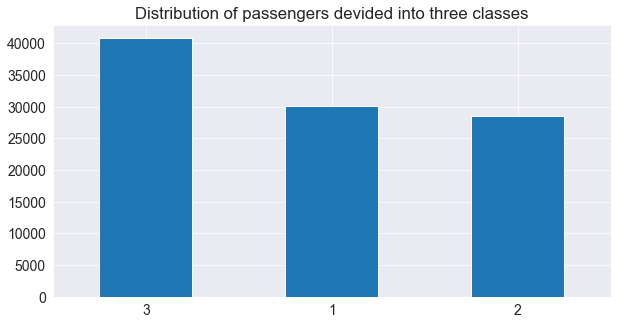

In [409]:
plt.title('Distribution of passengers devided into three classes')
passengers['Pclass'].value_counts().plot.bar(rot=0)

The feature 'Pclass' is a significant feature, because distribution is almost equable

<AxesSubplot:title={'center':'Distribution of number of brothers, sisters or spouses'}>

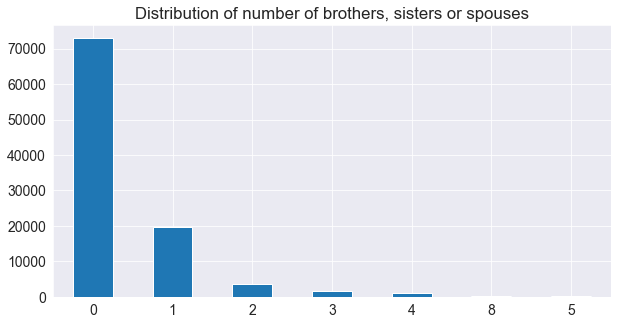

In [335]:
plt.title('Distribution of number of brothers, sisters or spouses')
passengers['SibSp'].value_counts().plot.bar(rot=0)

<AxesSubplot:title={'center':'Distribution of number of parents and children'}>

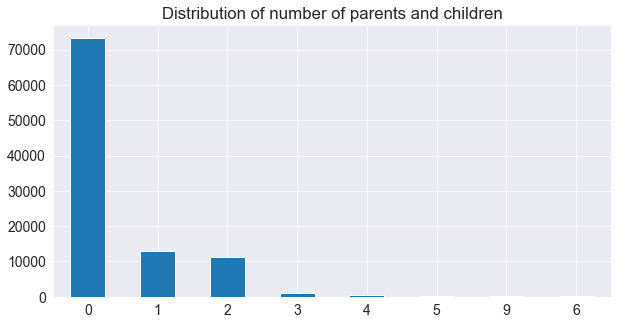

In [336]:
plt.title('Distribution of number of parents and children')
passengers['Parch'].value_counts().plot.bar(rot=0)

In [337]:
# plt.title('Distribution of ticket price')
# passengers['Fare'].value_counts().plot.bar(rot=0)

<AxesSubplot:title={'center':'Distribution of Embarked place'}, xlabel='Embarked_C,Embarked_Q,Embarked_S'>

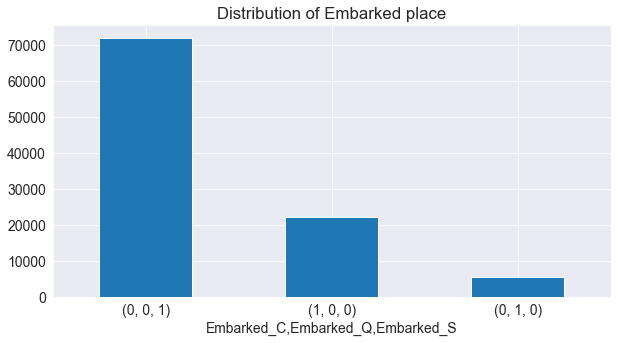

In [338]:
plt.title('Distribution of Embarked place')
passengers[['Embarked_C', 'Embarked_Q', 'Embarked_S']].value_counts().plot.bar(rot=0)

For analysis 'Age', we divide the age into the following ranges:
'children < 5 years old',

'children < 10 years old', 

'children < 15 years old',

'16-40 years old',

'40-60 years old',

'60-90 years old'

In [339]:
cut_labels_4 = ['children < 5 years old', 'children < 10 years old', 'children < 15 years old',
                '16-40 years old', '40-60 years old', '60-90 years old']
cut_bins = [0, 5, 10, 15, 40, 60, 90]
passengers['Age_range'] = pd.cut(passengers['Age'], bins=cut_bins, labels=cut_labels_4)
passengers.head(3)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_range
0,0,1,1,"Oconnor, Frankie",39.00,2,0,209245,27.14,C12239,0,1,0,0,1,16-40 years old
1,1,0,3,"Bryan, Drew",39.00,0,0,27323,13.35,no cabin number,0,1,0,0,1,16-40 years old
2,2,0,3,"Owens, Kenneth",0.33,1,2,CA 457703,71.29,no cabin number,0,1,0,0,1,children < 5 years old


<AxesSubplot:title={'center':'Distribution of passengers by Age'}>

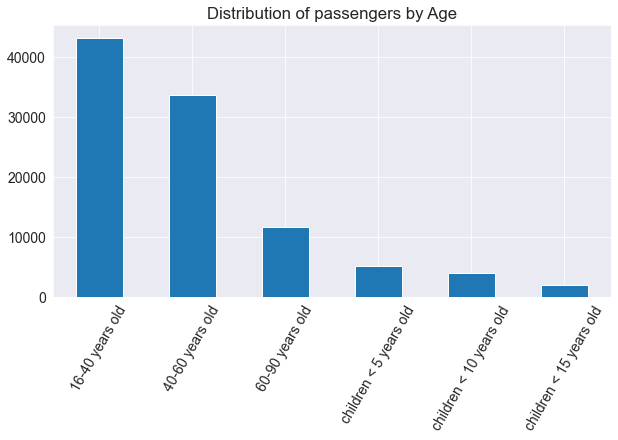

In [410]:
plt.title('Distribution of passengers by Age')
passengers['Age_range'].value_counts().plot.bar(rot=60)


We can make several conclusions:
1. Survived peaple are less than dead
2. More men than women
3. The most of passengers are from 3 class
4. The most of people are single (without family and children)
5. Most of people are embarked in Southampton
6. Most of people are of the middle age

### Assessment of the relationship between each variable and the target variable

<AxesSubplot:title={'center':'Relationship between Sex and target Survived'}, xlabel='Sex_male', ylabel='Survived'>

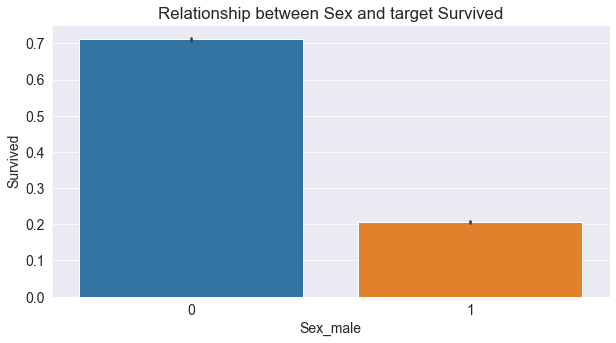

In [341]:
plt.title('Relationship between Sex and target Survived')
sns.barplot(x=passengers['Sex_male'], y=passengers['Survived'])

<AxesSubplot:title={'center':'Relationship between cabin class and target Survived'}, xlabel='Pclass', ylabel='Survived'>

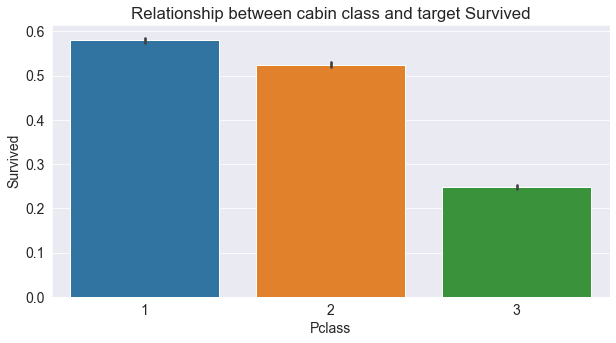

In [342]:
plt.title('Relationship between cabin class and target Survived')
sns.barplot(x=passengers['Pclass'], y=passengers['Survived'])

<AxesSubplot:xlabel='Pclass'>

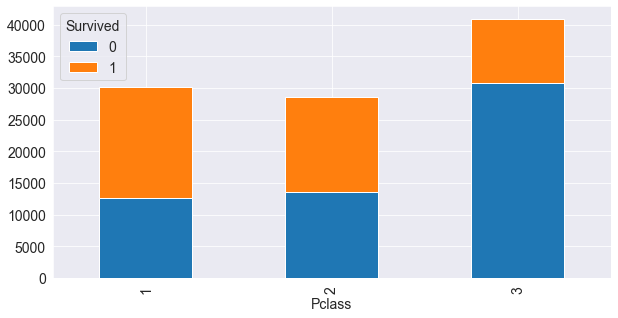

In [343]:
passengers.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

<AxesSubplot:title={'center':'Relationship between SibSp and target Survived'}, xlabel='SibSp', ylabel='Survived'>

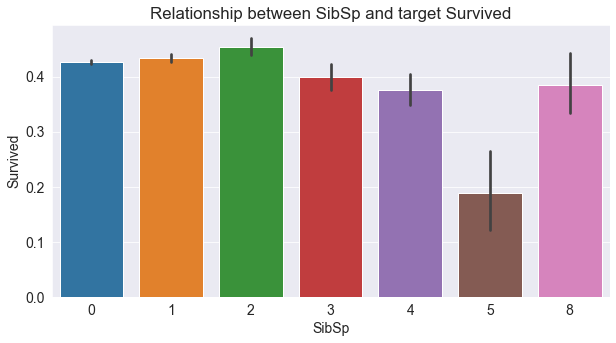

In [344]:
plt.title('Relationship between SibSp and target Survived')
sns.barplot(x=passengers['SibSp'], y=passengers['Survived'])

<AxesSubplot:title={'center':'Relationship between Parch and target Survived'}, xlabel='Parch', ylabel='Survived'>

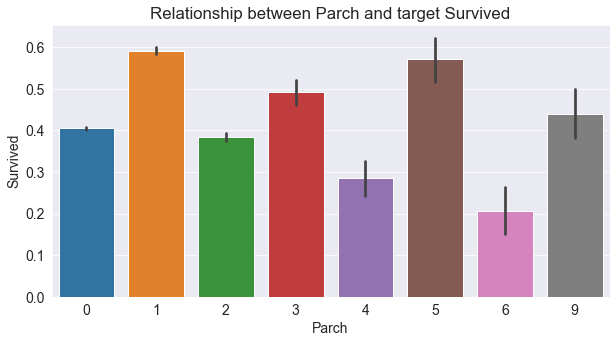

In [345]:
plt.title('Relationship between Parch and target Survived')
sns.barplot(x=passengers['Parch'], y=passengers['Survived'])

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

<Figure size 1008x432 with 0 Axes>

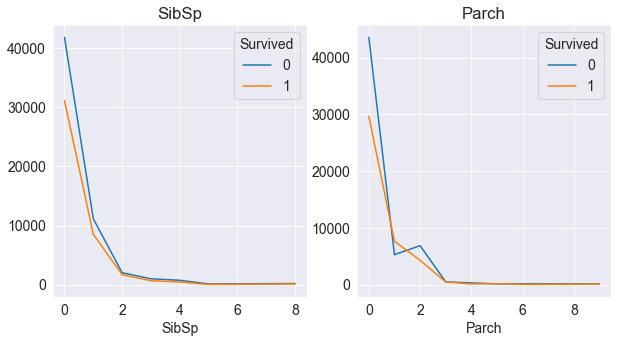

In [346]:
plt.figure(figsize=(14,6))
fig, axes = plt.subplots(ncols=2)

passengers.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
passengers.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

We can see that people with more than 1 relatives were saved less than single persons

<AxesSubplot:xlabel='Age_range'>

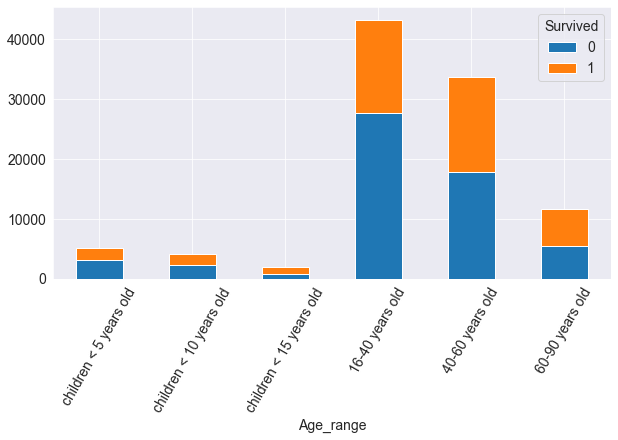

In [426]:
passengers.pivot_table('PassengerId', 'Age_range', 'Survived', 'count').plot(kind='bar', stacked=True, rot=60)


<AxesSubplot:xlabel='Age_range'>

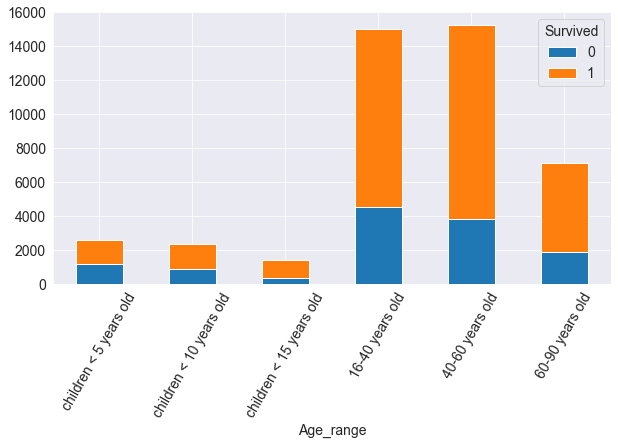

In [427]:
passengers[passengers.Sex_female == 1].pivot_table('PassengerId', 'Age_range', 'Survived', 'count').plot(kind='bar',
                                                                                                         stacked=True,
                                                                                                        rot=60)

Let's look up at corralation between each variable and target 'Survived'

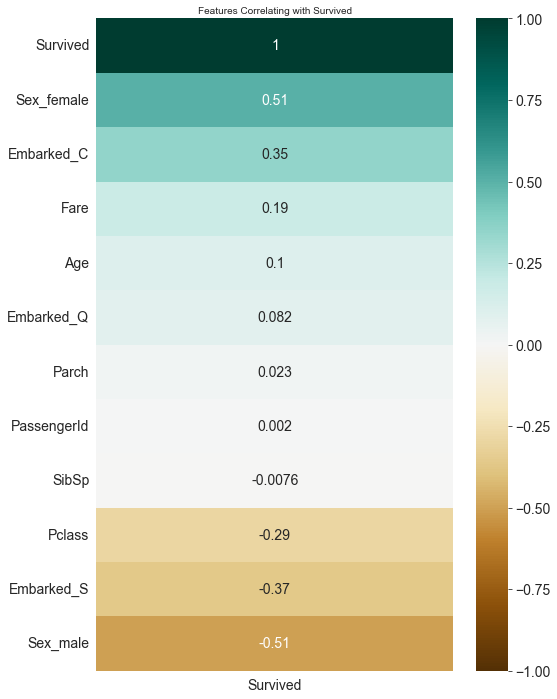

In [407]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(passengers.corr()[['Survived']].sort_values(by='Survived', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':10}, pad=5);

We can see the hightest corralation 0.51 is with variable 'Sex'

We can make several conclusions:
1. More survived are female
2. Less survived are in 3 class
3. Number survived people depends on Pclass (higher the class -  more people to be saved)
4. Less survived are in SibSp == 5
5. Less survived are in Parch == 6
6. People with more than 1 relatives were saved less than single persons
7. Age influences surviving less than sex
8. The hightest corralation 0.51 is with variable 'Sex'

### Assessment of the interaction between variables

Let's calculate the number of single men and single women

In [380]:
single_women = len(passengers.loc[(passengers.SibSp == 0) 
                              & (passengers.Parch == 0) 
                              & (passengers.Sex_female == 1)])
women = len(passengers.loc[(passengers.Sex_female == 1)])
single_women_persents = single_women/women*100

single_men = len(passengers.loc[(passengers.SibSp == 0) 
                              & (passengers.Parch == 0) 
                              & (passengers.Sex_male == 1)])
men = len(passengers.loc[(passengers.Sex_male == 1)])
single_men_persents = single_men/men*100
print('Single women in persents', round(single_women_persents,2), '%')
print('Single men in persents', round(single_men_persents,2), '%')


Single women in persents 55.83 %
Single men in persents 66.58 %


Let's take a look at number of single men and single women in different Pclass

In [424]:
single_women_Pclass = passengers[(passengers.SibSp == 0) 
                              & (passengers.Parch == 0) 
                              & (passengers.Sex_female == 1)].groupby(passengers.Pclass).agg(np.size)
single_women_Pclass

single_men_Pclass = passengers[(passengers.SibSp == 0) 
                              & (passengers.Parch == 0) 
                              & (passengers.Sex_male == 1)].groupby(passengers.Pclass).agg(np.size)

Text(0.5, 1.0, 'Women')

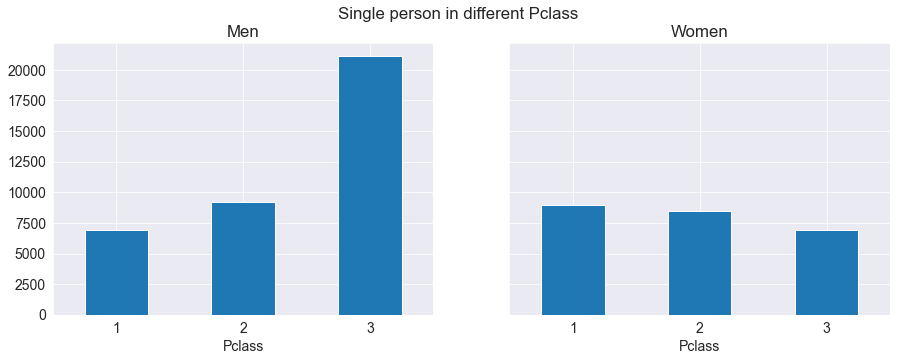

In [425]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Single person in different Pclass')

# Men
single_men_Pclass['PassengerId'].plot(ax=axes[0],kind='bar', rot=0)
axes[0].set_title('Men')
# Women
single_women_Pclass['PassengerId'].plot(ax=axes[1],kind='bar', rot=0)
axes[1].set_title('Women')


As we can see, single women are evenly distributed across Pclass, but single men mostly are in 3 Pclass. These men can be poor people looking for a best life.

In [297]:
# семейные и с детьми и более высокий класс

In [299]:
#  Сколько выжило одиноких пассажиров (в зависимости от мужчин и женщин)

In [300]:
# В каком клссе больше мужчинб женщин, детей, с братьями и сестрами

We can make several conclusions:
1. There are more than 66 % of single men and about 55% of single women
2. Single women are evenly distributed across Pclass
3. Single men mostly are in 3 Pclass

In [301]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_range
0,0,1,1,"Oconnor, Frankie",39.00,2,0,209245,27.14,C12239,0,1,0,0,1,16-40 years old
1,1,0,3,"Bryan, Drew",39.00,0,0,27323,13.35,no cabin number,0,1,0,0,1,16-40 years old
2,2,0,3,"Owens, Kenneth",0.33,1,2,CA 457703,71.29,no cabin number,0,1,0,0,1,children < 5 years old
3,3,0,3,"Kramer, James",19.00,0,0,A. 10866,13.04,no cabin number,0,1,0,0,1,16-40 years old
4,4,1,3,"Bond, Michael",25.00,0,0,427635,7.76,no cabin number,0,1,0,0,1,16-40 years old


# Summary

1. Целевая переменная 'Survived' хорошая, т.к.распределение примерно 50 на 50 ??????????где я это написала
2. Признак 'Sex' является существенным признаком, т.к. распределение примерно 50 на 50
3. Признак 'Pclass' является существенным признаком, т.к. распределение примерно равномерное
